In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [175]:
import numpy as np
import seaborn as sns
import pandas as pd
from metasense.epa import data as epa_data
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.cross_validation import train_test_split
from datetime import datetime
from IPython.display import HTML, Javascript, display

In [4]:
csvs = epa_data.load_data('../data')
data_map = {}
for csv, text in csvs.iteritems():
    data_map[csv] = epa_data.load_csv_from_string(text)

In [5]:
date_ids = []
date_frames = []
data_panel = {}
for date in data_map:
    reading_data = {}
    for reading_type in data_map[date]:
        reading_data[reading_type] = pd.DataFrame(data_map[date][reading_type])
    data_panel[date] = reading_data

In [6]:
D1 = pd.Panel4D(data_panel).convert_objects(convert_numeric=True).swapaxes(1, 2)

In [7]:
final_data_map = {}
for date in D1.keys():
    for time in D1[date].keys():
        year, month, day, hour = int(date[:4]), int(date[4:6]), int(date[6:8]), int(time)
        final_data_map[datetime(year, month, day, hour=time)] = D1[date][time]
data = pd.Panel(final_data_map).swapaxes(0, 1)

# Ozone Data

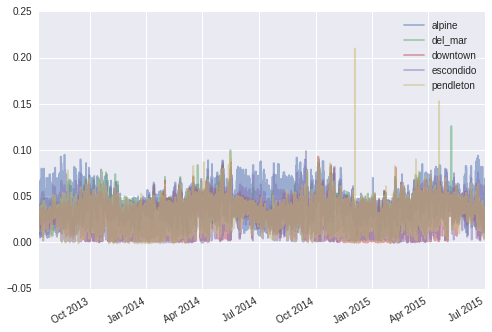

In [274]:
ozone_data = data['ozone'].dropna(thresh=15000, axis=1)
ozone_data = ozone_data.fillna(ozone_data.mean())
ozone_data.plot(alpha=0.5);
N, D = ozone_data.shape
X = []
y = []
for i in xrange(7, N):
    X.append(ozone_data[i - 7 : i - 1].as_matrix().flatten())
    y.append(ozone_data[i:i+1]) 
X, y = np.vstack(X), np.vstack(y)

In [275]:
models = {}
for a in [1.5e-05, 1.4e-05]:
    print "Alpha: ", a
    if a not in models:
        models[a] = []
    for d in xrange(D):
        model = Lasso(alpha=a)
        model.fit(X, y[:, d])
        models[a].append(model)
        print "Reconstruction error:", np.sum((model.predict(X) - y[:, d])**2)
        print "Sparsity:", sum(model.coef_ != 0)

Alpha:  1.5e-05
Reconstruction error: 1.31492427355
Sparsity: 3
Reconstruction error: 0.825284627514
Sparsity: 4
Reconstruction error: 1.7388320839
Sparsity: 4
Reconstruction error: 2.26973159545
Sparsity: 4
Reconstruction error: 1.52595922849
Sparsity: 3
Alpha:  1.4e-05
Reconstruction error: 1.30557321081
Sparsity: 4
Reconstruction error: 0.821788421523
Sparsity: 4
Reconstruction error: 1.72806199105
Sparsity: 4
Reconstruction error: 2.25733362869
Sparsity: 7
Reconstruction error: 1.52247931229
Sparsity: 3


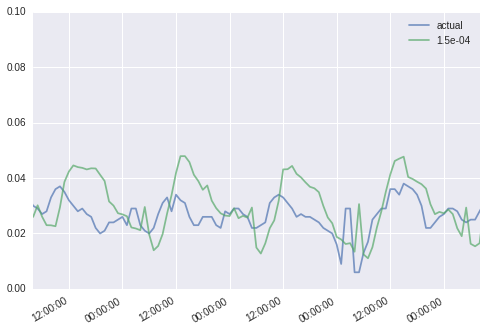

In [279]:
ozone_data['downtown'].plot(alpha=0.7, label='actual')
plot(ozone_data.T.keys()[7:], models[1.5e-05][3].predict(X)[:], alpha=.7, label='1.5e-04')

xlim([ozone_data.T.keys()[100], ozone_data.T.keys()[200]])
legend();

In [280]:
models[1.5e-05][3].coef_

array([-0.        , -0.        , -0.        , -0.01590788, -0.        ,
       -0.        , -0.        , -0.        , -0.07122   , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.00457844,  0.        ,  0.        ,  0.7266113 ,  0.        ])

# NO Data

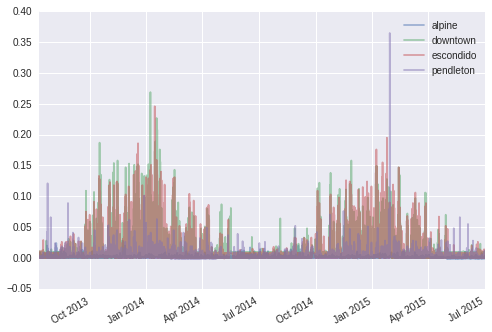

In [220]:
no_data = data['no'].dropna(thresh=13000, axis=1)
no_data = no_data.fillna(no_data.mean())
no_data.plot(alpha=0.5);
N, D = no_data.shape
X = []
y = []
for i in xrange(7, N):
    X.append(no_data[i - 7 : i - 1].as_matrix().flatten())
    y.append(no_data[i:i+1]) 
X, y = np.vstack(X), np.vstack(y)

In [264]:
models = {}
for a in [1e-5]:
    print "Alpha: ", a
    if a not in models:
        models[a] = []
    for d in xrange(D):
        model = Lasso(alpha=a)
        model.fit(X, y[:, d])
        models[a].append(model)
        print "Reconstruction error:", np.sum((model.predict(X) - y[:, d])**2)
        print "Sparsity:", sum(model.coef_ != 0)

Alpha:  1e-05
Reconstruction error: 0.0263451533934
Sparsity: 0
Reconstruction error: 3.429616082
Sparsity: 6
Reconstruction error: 3.32188942817
Sparsity: 6
Reconstruction error: 1.0257104106
Sparsity: 3


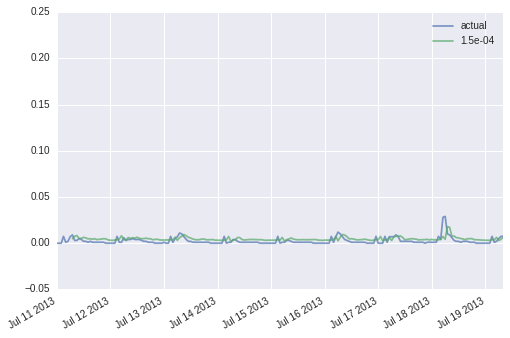

In [265]:
no_data['escondido'].plot(alpha=0.7, label='actual')
plot(no_data.T.keys()[7:], models[1e-5][2].predict(X)[:], alpha=.7, label='1.5e-04')

xlim([no_data.T.keys()[0], no_data.T.keys()[200]])
legend();

In [273]:
models[1e-5][2].coef_.reshape((6, 4))

array([[-0.        ,  0.10340557,  0.        ,  0.        ],
       [-0.        , -0.        ,  0.        , -0.        ],
       [-0.        , -0.        ,  0.        ,  0.        ],
       [-0.        , -0.04688136, -0.        ,  0.        ],
       [-0.        , -0.03828406, -0.04922376,  0.        ],
       [-0.        ,  0.06061556,  0.52941743,  0.        ]])